In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

# set up notebook to display multiple output in one cell
from IPython.display import Latex
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)

In [2]:
work_dir = "./"

In [3]:
filePaths = [f for f in os.listdir(work_dir) if f.endswith(".txt")]
for i in range(len(filePaths)):
    print(f'{i} - {filePaths[i]}')

0 - healthOrderTime_localHost.txt
1 - healthOrderTime_miniNet3.txt
2 - healthOrderTime_miniNet2.txt
3 - healthOrderTime_miniNet1.txt


In [4]:
file = pd.read_csv(work_dir+filePaths[1], sep=',')

In [5]:
file.head()

,iterStep,process,time
0,0,health serialization,0.000199
1,1,health deserialization,1.679467
2,1,health serialization,0.000511
3,2,health deserialization,1.132128
4,2,order serialization,0.001672


In [6]:
datDF = file.copy()
datDF['iterStep'] = datDF['iterStep'].astype(int)
datDF['process'] = datDF['process'].astype(str)
datDF['time'] = datDF['time'].astype(float)
datDF.head()

,iterStep,process,time
0,0,health serialization,0.000199
1,1,health deserialization,1.679467
2,1,health serialization,0.000511
3,2,health deserialization,1.132128
4,2,order serialization,0.001672


In [7]:
tmpLST = []
for i in range(len(datDF)):
    if 'health' in datDF['process'][i].lower():
        tmpLST.append("health")
        datDF.at[i,'process'] = datDF['process'][i].lower().replace('health ',"")

    if 'order' in datDF['process'][i].lower():
        tmpLST.append("order")
        datDF.at[i,'process'] = datDF['process'][i].lower().replace('order ',"")
    
datDF['server'] = tmpLST

In [8]:
datDF.head()

,iterStep,process,time,server
0,0,serialization,0.000199,health
1,1,deserialization,1.679467,health
2,1,serialization,0.000511,health
3,2,deserialization,1.132128,health
4,2,serialization,0.001672,order


In [9]:
serialDF = datDF[datDF['process']=='serialization'].reset_index(drop=True)

# convert seconds to miliseconds
serialDF['time'] = serialDF['time']*1000

serialDF.head()

,iterStep,process,time,server
0,0,serialization,0.199318,health
1,1,serialization,0.511408,health
2,2,serialization,1.671791,order
3,3,serialization,0.497341,health
4,4,serialization,0.562906,health


In [10]:
deserialDF = datDF[datDF['process']=='deserialization'].reset_index(drop=True)
deserialDF.head()

,iterStep,process,time,server
0,1,deserialization,1.679467,health
1,2,deserialization,1.132128,health
2,3,deserialization,1.134948,order
3,4,deserialization,1.136526,health
4,5,deserialization,1.132940,health


# Latency Data Analysis

For this analysis we will be using a boxplot. A box and whisker plot (otherwise known as a boxplot), is a graph summarising a set of data. The shape of the boxplot shows how the data is distributed and it also shows any outliers. It is a useful way to compare different sets of data as you can draw more than one boxplot per graph. These can be displayed alongside a number line, horizontally or vertically.

# Reading a Box and Whisker Plot

Interpreting a boxplot can be done once you understand what the different lines mean on a box and whisker diagram. The line splitting the box in two represents the median value. This shows that 50% of the data lies on the left hand side of the median value and 50% lies on the right hand side. The left edge of the box represents the lower quartile; it shows the value at which the first 25% of the data falls up to. The right edge of the box shows the upper quartile; it shows that 25% of the data lies to the right of the upper quartile value. The values at which the horizontal lines stop at are the values of the upper and lower values of the data. The single points on the diagram show the outliers.

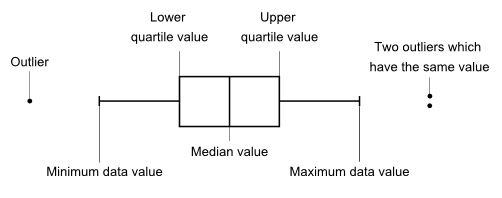

# Serialization

<AxesSubplot:xlabel='time', ylabel='server'>

Text(0.5, 0, 'time (ms)')

Text(0, 0.5, 'Server Latency')

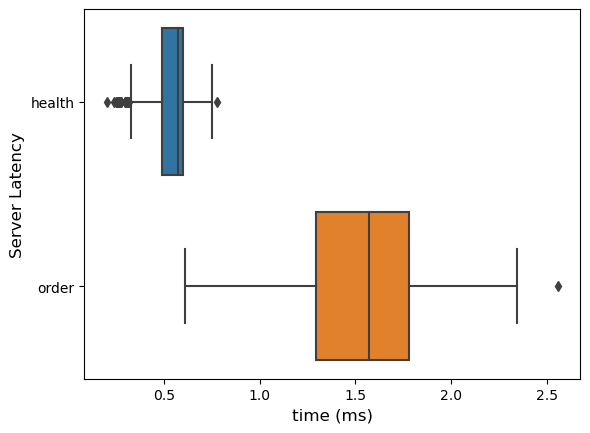

In [17]:
sns.boxplot(data=serialDF, x="time", y="server")
plt.xlabel('time (ms)', fontsize=12)
plt.ylabel('Server Latency', fontsize=12)
plt.show()

## Health Server

In [18]:
tmpHealth = serialDF[serialDF['server']=='health'].reset_index(drop=True)
tmpHealth.head()
print("Median value: {}".format(np.round_(np.median(tmpHealth['time']),3)))
tmpHealth.describe()

,iterStep,process,time,server
0,0,serialization,0.199318,health
1,1,serialization,0.511408,health
2,3,serialization,0.497341,health
3,4,serialization,0.562906,health
4,6,serialization,0.589132,health


Median value: 0.574


,iterStep,time
count,200.000000,200.000000
mean,149.000000,0.533357
std,86.816968,0.115543
min,0.000000,0.199318
25%,74.500000,0.488400
50%,149.000000,0.574231
75%,223.500000,0.598252
max,298.000000,0.777721


## Order Server

In [19]:
tmpOrder = serialDF[serialDF['server']=='order'].reset_index(drop=True)
tmpOrder.head()
print("Median value: {}".format(np.round_(np.median(tmpOrder['time']),3)))
tmpOrder.describe()

,iterStep,process,time,server
0,2,serialization,1.671791,order
1,5,serialization,2.242565,order
2,8,serialization,1.724482,order
3,11,serialization,1.914263,order
4,14,serialization,0.926971,order


Median value: 1.572


,iterStep,time
count,100.000000,100.000000
mean,150.500000,1.548879
std,87.034476,0.401323
min,2.000000,0.606775
25%,76.250000,1.295209
50%,150.500000,1.571894
75%,224.750000,1.781285
max,299.000000,2.558231


# Deserialization

<AxesSubplot:xlabel='time', ylabel='server'>

Text(0.5, 0, 'time (sec)')

Text(0, 0.5, 'Server Latency')

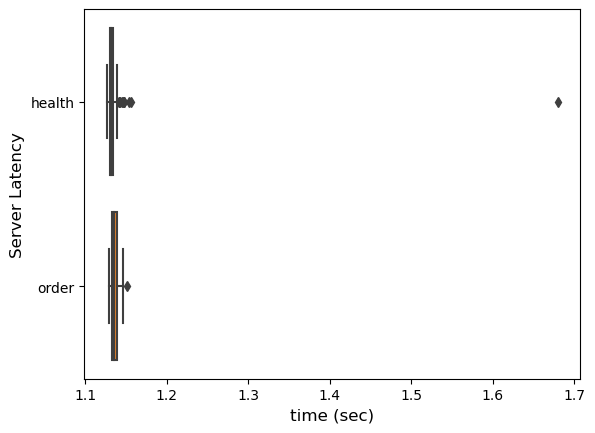

In [20]:
sns.boxplot(data=deserialDF, x="time", y="server")
plt.xlabel('time (sec)', fontsize=12)
plt.ylabel('Server Latency', fontsize=12)
# plt.xscale('log')

## Health Server

In [21]:
tmpHealth = deserialDF[deserialDF['server']=='health'].reset_index(drop=True)
tmpHealth.head()
print("Median value: {}".format(np.round_(np.median(tmpHealth['time']),3)))
tmpHealth.describe()

,iterStep,process,time,server
0,1,deserialization,1.679467,health
1,2,deserialization,1.132128,health
2,4,deserialization,1.136526,health
3,5,deserialization,1.132940,health
4,7,deserialization,1.130839,health


Median value: 1.132


,iterStep,time
count,200.000000,200.000000
mean,150.000000,1.135771
std,86.816968,0.038884
min,1.000000,1.126742
25%,75.500000,1.130218
50%,150.000000,1.132395
75%,224.500000,1.134818
max,299.000000,1.679467


## Order Server

In [22]:
tmpOrder = deserialDF[deserialDF['server']=='order'].reset_index(drop=True)
tmpOrder.head()
print("Median value: {}".format(np.round_(np.median(tmpOrder['time']),3)))
tmpOrder.describe()

,iterStep,process,time,server
0,3,deserialization,1.134948,order
1,6,deserialization,1.138816,order
2,9,deserialization,1.138847,order
3,12,deserialization,1.137353,order
4,15,deserialization,1.139477,order


Median value: 1.135


,iterStep,time
count,100.000000,100.000000
mean,151.500000,1.135815
std,87.034476,0.004043
min,3.000000,1.129378
25%,77.250000,1.132802
50%,151.500000,1.135033
75%,225.750000,1.138687
max,300.000000,1.150948
